Inferences :
    
    * Most of the orders comes from northeast and midwest regions
    * User 2 , User 1 and User 6 are the most frequent customers
    * User 1 , User 3 and User 2 are the highest spending users
    * Grilled chicken and Spaghetti are the most ordered items and the higest priced items
    * Dinner is the preferred meal
    * Order cancelled as not very high compared to completed orders. Prices also doesn't vary much

    
    

### Import Libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read Datafrom Excel File

In [32]:
UserDetails = pd.read_excel("Assignment.xlsx",sheet_name='UserDetails.csv')

In [33]:
CookingSessions = pd.read_excel("Assignment.xlsx",sheet_name='CookingSessions.csv')

In [34]:
OrderDetails = pd.read_excel("Assignment.xlsx",sheet_name='OrderDetails.csv')

### Analyze the UserDetails Table

##### Mapping locations to its demographic regions

In [36]:
demographic_map = {"New York":"Northeast","Los Angeles":"WestCoast","Chicago":"Midwest","San Francisco":"WestCoast","Seattle":"WestCoast","Austin":"South","Boston":"Northeast","Miami":"South","Dallas":"South","Phoenix":"South"}

In [37]:
UserDetails['Demography'] = UserDetails['Location'].map(demographic_map)

In [38]:
UserDetails

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Demography
0,U001,Alice Johnson,28.0,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12.0,Northeast
1,U002,Bob Smith,35.0,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8.0,WestCoast
2,U003,Charlie Lee,42.0,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15.0,Midwest
3,U004,David Brown,27.0,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10.0,WestCoast
4,U005,Emma White,30.0,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9.0,WestCoast
5,U006,Frank Green,25.0,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7.0,South
6,U007,Grace King,38.0,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14.0,Northeast
7,U008,Henry Lee,31.0,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5.0,South
8,U009,Irene Moore,33.0,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6.0,South
9,U010,Jack White,29.0,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8.0,South


In [39]:
demo_df = UserDetails.groupby("Demography")['Total Orders'].agg(['sum', 'count', 'mean']).reset_index()

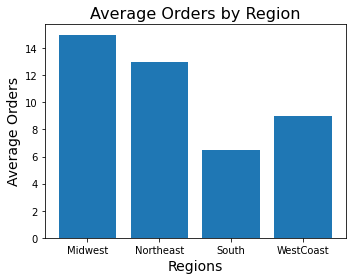

In [40]:
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(5, 4))
plt.bar(demo_df['Demography'], demo_df['mean'])

# Add titles and labels
plt.title('Average Orders by Region', fontsize=16)
plt.xlabel('Regions', fontsize=14)
plt.ylabel('Average Orders', fontsize=14)

# Display the bar plot
plt.tight_layout()
plt.show()


Based on the demographic information :

    * Midwest and Northeast users orders the most , as the population density is higher
    

### Analysing most frequent customer

In [41]:
#using registration date

In [47]:
from datetime import datetime
current_date = '2023-12-31'
UserDetails['DaysDifference'] = (datetime.strptime(current_date, "%Y-%m-%d") - UserDetails['Registration Date']).dt.days
UserDetails

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Demography,DaysDifference
0,U001,Alice Johnson,28.0,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12.0,Northeast,350
1,U002,Bob Smith,35.0,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8.0,WestCoast,314
2,U003,Charlie Lee,42.0,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15.0,Midwest,296
3,U004,David Brown,27.0,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10.0,WestCoast,270
4,U005,Emma White,30.0,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9.0,WestCoast,223
5,U006,Frank Green,25.0,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7.0,South,199
6,U007,Grace King,38.0,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14.0,Northeast,182
7,U008,Henry Lee,31.0,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5.0,South,142
8,U009,Irene Moore,33.0,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6.0,South,121
9,U010,Jack White,29.0,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8.0,South,82


In [49]:
UserDetails['Days_per_Order'] = UserDetails['DaysDifference']/UserDetails['Total Orders']

In [51]:
UserDetails.sort_values(by='Days_per_Order',ascending=False).head(3)

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Demography,DaysDifference,Days_per_Order
1,U002,Bob Smith,35.0,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8.0,WestCoast,314,39.250000
0,U001,Alice Johnson,28.0,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12.0,Northeast,350,29.166667
5,U006,Frank Green,25.0,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7.0,South,199,28.428571


### Comparing Cooking sessions and Order Details

In [16]:
merged_df = pd.merge(CookingSessions,OrderDetails[['Order ID','Order Date','Amount (USD)','Session ID',"Rating"]],left_on=['Session ID'],right_on=['Session ID'],how='left')

#####               Spending patterns (Top 3 Spends)

In [21]:
spend_df = merged_df.groupby("User ID")['Amount (USD)'].sum().reset_index()

In [26]:
spend_df.sort_values(by=['Amount (USD)'],ascending=False).head(3)

,User ID,Amount (USD)
0,U001,35.0
2,U003,32.0
1,U002,31.0


#####               Revenue per dish

In [52]:
merged_df.groupby("Dish Name")['Amount (USD)'].sum().reset_index()   #Revenue by dish name

,Dish Name,Amount (USD)
0,Caesar Salad,28.0
1,Grilled Chicken,51.0
2,Oatmeal,7.0
3,Pancakes,16.5
4,Spaghetti,55.5
5,Veggie Burger,22.0


#####     Time to prepare for each dish

In [29]:
merged_df.groupby("Dish Name")['Duration (mins)'].mean().reset_index()   #Average time to prepare for each dish

,Dish Name,Duration (mins)
0,Caesar Salad,21.666667
1,Grilled Chicken,42.500000
2,Oatmeal,10.000000
3,Pancakes,30.000000
4,Spaghetti,35.000000
5,Veggie Burger,20.000000


#####   Frequency of ordering for each dish


In [53]:
merged_df.groupby("Dish Name")['Duration (mins)'].count().reset_index(name='Order_Frequency')

,Dish Name,Order_Frequency
0,Caesar Salad,3
1,Grilled Chicken,4
2,Oatmeal,1
3,Pancakes,2
4,Spaghetti,4
5,Veggie Burger,2


In [21]:
#Average age of our customers is 31, we can calculate it using mean and median mostly.
print("Average age of Customer :  " + str(int(UserDetails["Age"].mean())))


Average age of Customer :  31


In [25]:
UserDetails["Location"].unique()
'''
Given location of our customer I conclude that Many of these cities are among the most populous in the U.S.
We can identify cooking trends in each city.
We can highlight the features of our appliance according to local lifestyle.
Collaborate with local influencers, chefs, bloggers, etc.
Offer excellent after-sales support,
and actively gather feedback to improve and customize your offerings based on city-specific needs

'''

array(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Seattle',
       'Austin', 'Boston', 'Miami', 'Dallas', 'Phoenix'], dtype=object)

In [50]:
(UserDetails["Favorite Meal"].value_counts()) / (UserDetails["Favorite Meal"].value_counts().sum()) * 100

# in this we can see mostly our customer use appliance for Dinner like from our data 50% we use our products for Dinner.

Dinner       50.0
Lunch        30.0
Breakfast    20.0
Name: Favorite Meal, dtype: float64

# Analyze the CookingSession table

In [96]:
CookingSessions.groupby(["Dish Name", "Meal Type"])["Session Rating"].mean()

Dish Name        Meal Type
Caesar Salad     Lunch        4.366667
Grilled Chicken  Dinner       4.775000
Oatmeal          Breakfast    4.100000
Pancakes         Breakfast    4.400000
Spaghetti        Dinner       4.625000
Veggie Burger    Lunch        4.350000
Name: Session Rating, dtype: float64

In [ ]:
'''
Top one dish for each meal are :
    
   1. Dinner - Grilled Chicken
   2. Lunch - Caesar Salad 
   3. Breakfast - Pancakes
   
Dishes Categories:

   1. Dinner - Grilled Chicken and Spaghetti
   2. Lunch - Caesar Salad and Veggie Burger
   3. Breakfast - Pancakes and Oatmeal

'''

# Using visualization compare peak usage hour/weekday

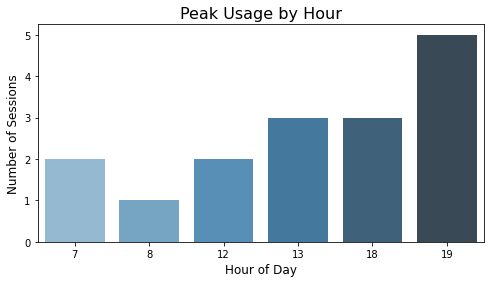

In [102]:
# Extract hour and weekday
CookingSessions['StartHour'] = CookingSessions['Session Start'].dt.hour
CookingSessions['Weekday'] = CookingSessions['Session Start'].dt.day_name()

# Most common session start times (hourly)
hourly_usage = CookingSessions['StartHour'].value_counts().sort_index()

# Most common days of the week
weekday_usage = CookingSessions['Weekday'].value_counts()

# Plotting hourly usage
plt.figure(figsize=(8, 4))
sns.barplot(x=hourly_usage.index, y=hourly_usage.values, palette='Blues_d')
plt.title('Peak Usage by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.xticks(range(0, 6))
plt.show()

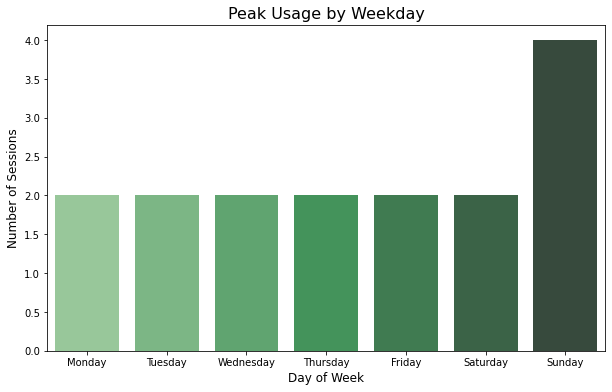

In [103]:
# Plotting weekday usage
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_usage.index, y=weekday_usage.values, palette='Greens_d', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Peak Usage by Weekday', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.show()

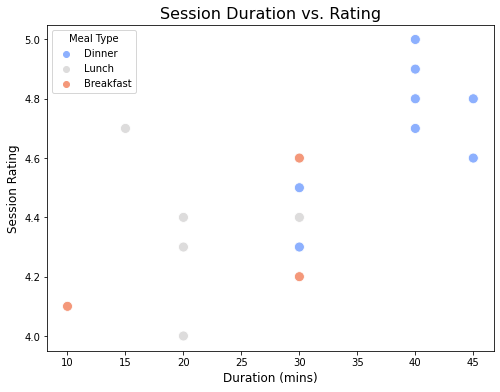

In [107]:
#Session Duration against Rating

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration (mins)', y='Session Rating', data=CookingSessions, hue='Meal Type', palette='coolwarm', s=100)
plt.title('Session Duration vs. Rating', fontsize=16)
plt.xlabel('Duration (mins)', fontsize=12)
plt.ylabel('Session Rating', fontsize=12)
plt.show()

With these visualizations we can see our session watched mostly during dinner time and on Sunday. 
We conclude that our bestseller are Spaghetti and Grilled Chicken with highest rating.

# Analyze the OrderDetails Table

In [158]:
OrderDetails.groupby('Meal Type')['Rating'].mean()

Meal Type
Breakfast    4.0
Dinner       4.5
Lunch        4.0
Name: Rating, dtype: float64

In [133]:
revenue_by_date = OrderDetails.groupby(OrderDetails['Order Date'].dt.date)['Amount (USD)'].sum()
revenue_by_date

Order Date
2024-12-01    25.0
2024-12-02    20.5
2024-12-03    23.0
2024-12-04    24.5
2024-12-05    19.0
2024-12-06    21.0
2024-12-07    22.0
2024-12-08    25.0
Name: Amount (USD), dtype: float64

In [140]:
avg_rating_meal_type = OrderDetails.groupby('Meal Type')['Rating'].mean()
meal_type_counts = OrderDetails['Meal Type'].value_counts()
order_status_counts = OrderDetails['Order Status'].value_counts()
avg_amount_by_status = OrderDetails.groupby('Order Status')['Amount (USD)'].mean()
order_status_counts

# it is good that we have very less canceled orders

Completed    14
Canceled      2
Name: Order Status, dtype: int64

In [135]:
avg_amount_by_status

Order Status
Canceled     11.750000
Completed    11.178571
Name: Amount (USD), dtype: float64

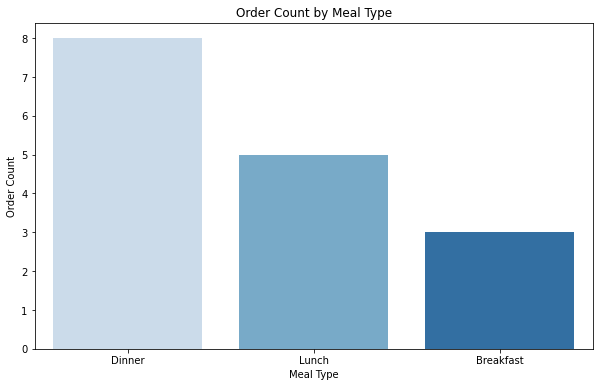

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(x=meal_type_counts.index, y=meal_type_counts.values, palette='Blues')
plt.title('Order Count by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Order Count')
plt.show()

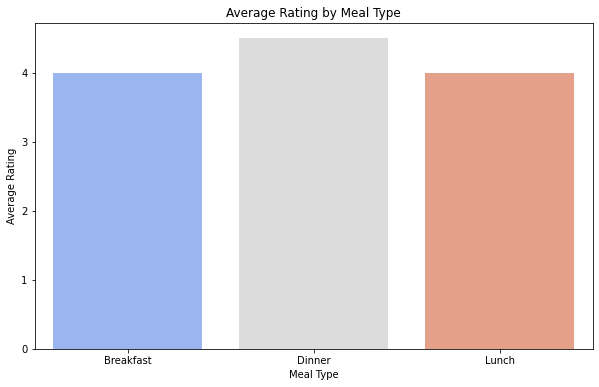

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_meal_type.index, y=avg_rating_meal_type.values, palette='coolwarm')
plt.title('Average Rating by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Average Rating')
plt.show()

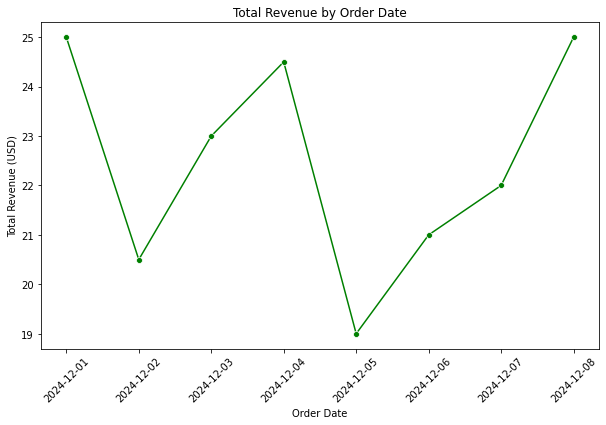

In [143]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=revenue_by_date.index, y=revenue_by_date.values, marker='o', color='green')
plt.title('Total Revenue by Order Date')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()
